In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [2]:
# files = os.listdir('data/data_spotify')
# data = pd.DataFrame()
# for f_name in files:
#   tmp = pd.read_csv('data/data_spotify/'+f_name)
#   frames = [data, tmp]
#   data = pd.concat(frames)

data = pd.read_csv('data/kaggle/KaggleData.csv')

print(data.shape)

(4081, 46)


In [3]:
# E or I data processing
data_Ixxx = data[data['mbti'].isin([0,1,4,5,8,9,12,13])].assign(EorI=0)
data_Exxx = data[data['mbti'].isin([2,3,6,7,10,11,14,15])].assign(EorI=1)
frames = [data_Ixxx, data_Exxx]
data = pd.concat(frames)

# N or S data processing
data_xNxx = data[data['mbti'].isin([0,1,2,3,4,5,6,7])].assign(NorS=0)
data_xSxx = data[data['mbti'].isin([8,9,10,11,12,13,14,15])].assign(NorS=1)
frames = [data_xNxx, data_xSxx]
data = pd.concat(frames)

# T or F data processing
data_xxTx = data[data['mbti'].isin([0,1,2,3,8,10,12,14])].assign(TorF=0)
data_xxFx = data[data['mbti'].isin([4,5,6,7,9,11,13,15])].assign(TorF=1)
frames = [data_xxTx, data_xxFx]
data = pd.concat(frames)

# J or P data processing
data_xxxJ = data[data['mbti'].isin([0,2,4,6,8,9,10,11])].assign(JorP=0)
data_xxxP = data[data['mbti'].isin([1,3,5,7,12,13,14,15])].assign(JorP=1)
frames = [data_xxxJ, data_xxxP]
data = pd.concat(frames)

print(data_Ixxx.shape)
print(data_Exxx.shape)
print(data_xNxx.shape)
print(data_xSxx.shape)
print(data_xxTx.shape)
print(data_xxFx.shape)
print(data_xxxJ.shape)
print(data_xxxP.shape)
print(data.shape)



(2159, 47)
(1922, 47)
(2358, 48)
(1723, 48)
(2070, 49)
(2011, 49)
(1815, 50)
(2266, 50)
(4081, 50)


In [37]:
# EorI accuracy
X = data[['acousticness', 'instrumentalness', 'valence', 'loudness', 'danceability', 'energy' ]]
y = data[['EorI']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_eori = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=3)
knn_eori.fit(X_train, y_train)
y_pred = knn_eori.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.61%


/Users/jinwooseong/opt/miniconda3/envs/GIX/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
# NorS accuracy
X = data[['acousticness', 'instrumentalness', 'valence', 'danceability', 'loudness']]
y = data[['NorS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_nors = KNeighborsClassifier(n_neighbors=15)
knn_nors.fit(X_train, y_train)
y_pred = knn_nors.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.57%


/Users/jinwooseong/opt/miniconda3/envs/GIX/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
# TorF accuracy
X = data[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness', 'energy']]
y = data[['TorF']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_torf = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_torf.fit(X_train, y_train)
y_pred = knn_torf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.61%


/Users/jinwooseong/opt/miniconda3/envs/GIX/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
# JorP accuracy
X = data[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness']]
y = data[['JorP']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_jorp = KNeighborsClassifier(n_neighbors=5)
knn_jorp.fit(X_train, y_train)
y_pred = knn_jorp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.84%


/Users/jinwooseong/opt/miniconda3/envs/GIX/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:
# 4 types
data_kaggle = pd.read_csv('data/kaggle/KaggleData.csv')
print(data_kaggle.shape)
X = data_kaggle[['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'instrumentalness']]
y = data_kaggle[['function_pair']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(4081, 46)
Accuracy: 34.78%


/Users/jinwooseong/opt/miniconda3/envs/GIX/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [9]:
data_Ixxx.describe()

,mbti,function_pair,danceability,danceability_stdev,energy,energy_stdev,loudness,loudness_stdev,mode,mode_stdev,...,AMajor_count,A#/Bbminor_count,BMajor_count,Dminor_count,D#_Ebminor_count,Gminor_count,A#/BbMajor_count,F#/GbMajor_count,Bminor_count,EorI
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,...,2159.000000,2159.000000,2159.000000,2159.000000,2157.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.0
mean,6.270496,1.442334,0.570312,0.139240,0.603732,0.183948,-7.635103,3.105798,0.625509,0.465003,...,2.504863,1.201482,1.337656,0.833719,0.422346,1.042149,1.493284,1.739231,1.858268,0.0
std,4.640956,1.152137,0.068024,0.022020,0.114804,0.035982,2.115332,1.055250,0.143821,0.059624,...,1.883997,1.341460,1.321535,1.061437,0.706530,1.105040,1.408904,1.445357,1.648521,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.224077,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.530760,0.125021,0.541193,0.162665,-8.419530,2.400351,0.531915,0.452414,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
50%,5.000000,1.000000,0.567581,0.139298,0.613548,0.184670,-7.371480,2.949470,0.620000,0.489246,...,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.0
75%,12.000000,3.000000,0.610850,0.153586,0.678720,0.206631,-6.534380,3.661855,0.720000,0.502625,...,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.0
max,13.000000,3.000000,0.793800,0.282041,0.966200,0.298931,0.000000,9.471898,1.000000,0.522233,...,10.000000,21.000000,11.000000,7.000000,6.000000,9.000000,12.000000,10.000000,9.000000,0.0


In [10]:
data_Ixxx.describe()

,mbti,function_pair,danceability,danceability_stdev,energy,energy_stdev,loudness,loudness_stdev,mode,mode_stdev,...,AMajor_count,A#/Bbminor_count,BMajor_count,Dminor_count,D#_Ebminor_count,Gminor_count,A#/BbMajor_count,F#/GbMajor_count,Bminor_count,EorI
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,...,2159.000000,2159.000000,2159.000000,2159.000000,2157.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.0
mean,6.270496,1.442334,0.570312,0.139240,0.603732,0.183948,-7.635103,3.105798,0.625509,0.465003,...,2.504863,1.201482,1.337656,0.833719,0.422346,1.042149,1.493284,1.739231,1.858268,0.0
std,4.640956,1.152137,0.068024,0.022020,0.114804,0.035982,2.115332,1.055250,0.143821,0.059624,...,1.883997,1.341460,1.321535,1.061437,0.706530,1.105040,1.408904,1.445357,1.648521,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-27.224077,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,0.000000,0.530760,0.125021,0.541193,0.162665,-8.419530,2.400351,0.531915,0.452414,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
50%,5.000000,1.000000,0.567581,0.139298,0.613548,0.184670,-7.371480,2.949470,0.620000,0.489246,...,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.0
75%,12.000000,3.000000,0.610850,0.153586,0.678720,0.206631,-6.534380,3.661855,0.720000,0.502625,...,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.0
max,13.000000,3.000000,0.793800,0.282041,0.966200,0.298931,0.000000,9.471898,1.000000,0.522233,...,10.000000,21.000000,11.000000,7.000000,6.000000,9.000000,12.000000,10.000000,9.000000,0.0


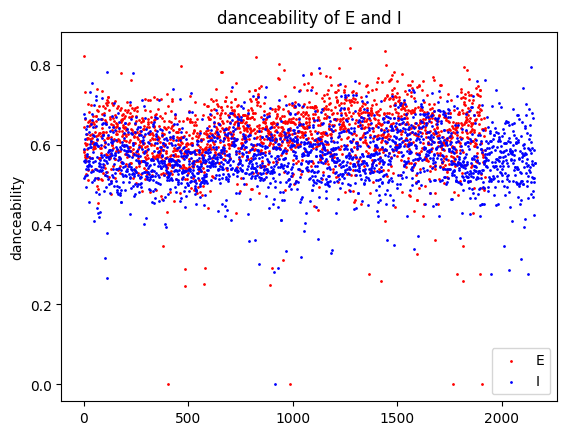

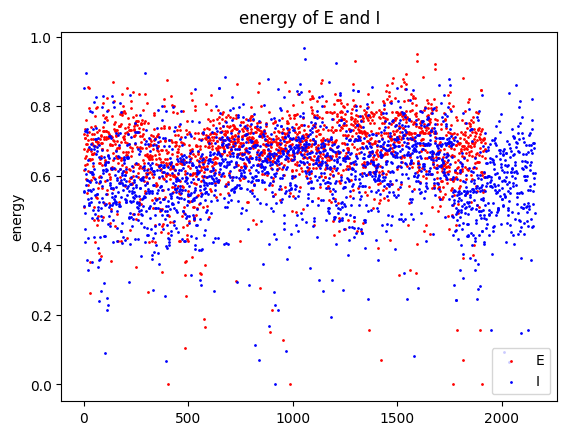

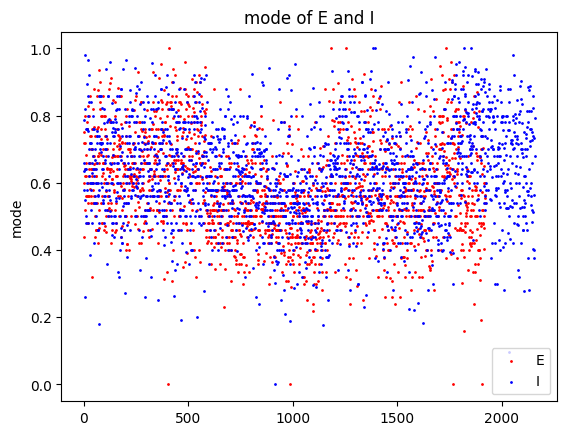

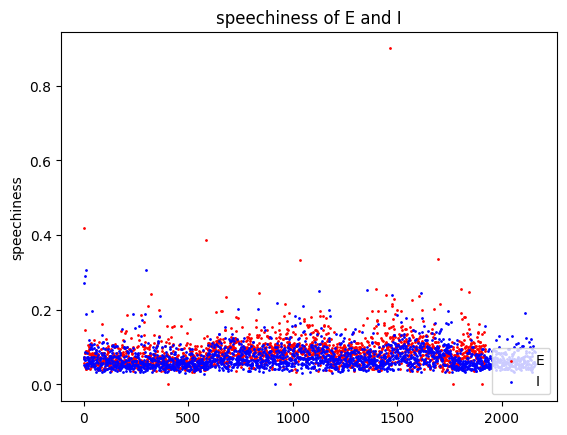

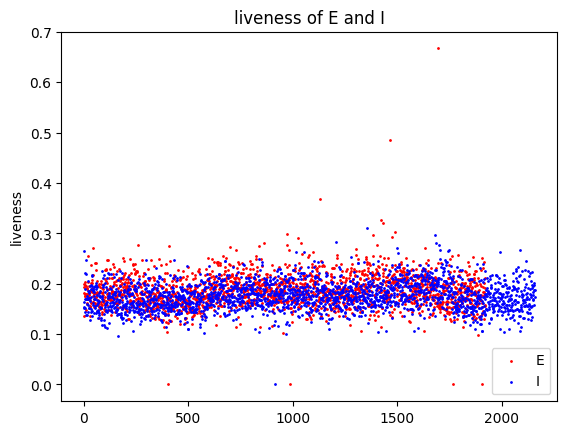

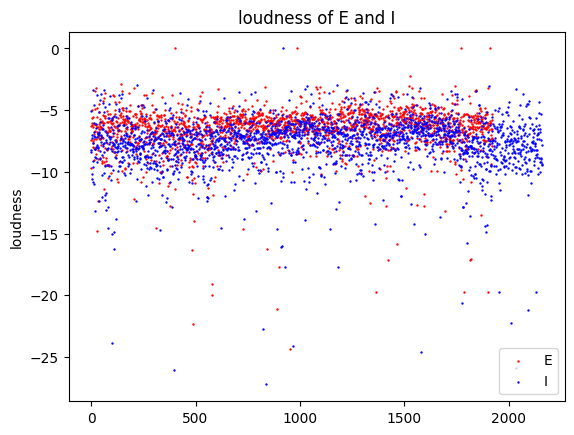

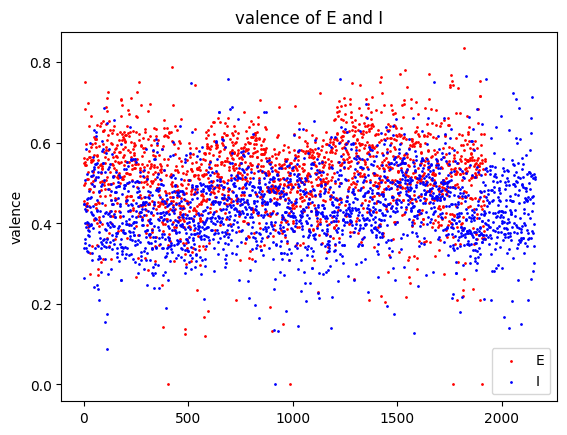

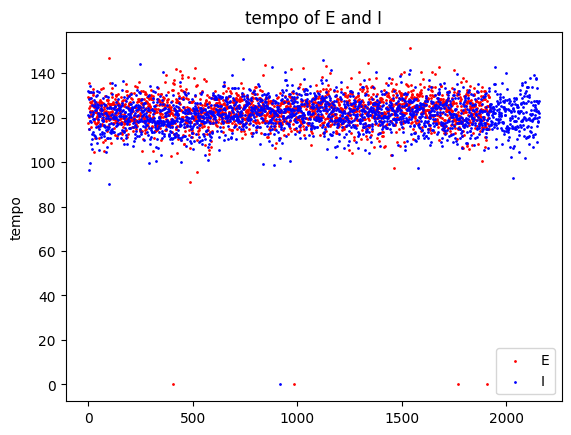

In [11]:
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np

##E or I

#danceability

e_dance = np.arange(len(data_Exxx['danceability']))
i_dance = np.arange(len(data_Ixxx['danceability']))
plt.scatter(e_dance, data_Exxx['danceability'], label='E', c='r', s=1)
plt.scatter(i_dance, data_Ixxx['danceability'], label='I', c='b', s=1)
plt.ylabel('danceability')
plt.title('danceability of E and I')
plt.legend(loc='lower right')
plt.show()

#energy
e_energy = np.arange(len(data_Exxx['energy']))
i_energy = np.arange(len(data_Ixxx['energy']))

plt.scatter(e_energy, data_Exxx['energy'], label='E', c='r', s=1)
plt.scatter(i_energy, data_Ixxx['energy'], label='I', c='b', s=1)
plt.ylabel('energy')
plt.title('energy of E and I')
plt.legend(loc='lower right')
plt.show()

# mode
e_mode = np.arange(len(data_Exxx['mode']))
i_mode = np.arange(len(data_Ixxx['mode']))
plt.scatter(e_mode, data_Exxx['mode'], label='E', c='r', s=1)
plt.scatter(i_mode, data_Ixxx['mode'], label='I', c='b', s=1)
plt.ylabel('mode')
plt.title('mode of E and I')
plt.legend(loc='lower right')
plt.show()

# speechiness
e_speechiness = np.arange(len(data_Exxx['speechiness']))
i_speechiness = np.arange(len(data_Ixxx['speechiness']))
plt.scatter(e_speechiness, data_Exxx['speechiness'], label='E', c='r', s=1)
plt.scatter(i_speechiness, data_Ixxx['speechiness'], label='I', c='b', s=1)
plt.ylabel('speechiness')
plt.title('speechiness of E and I')
plt.legend(loc='lower right')
plt.show()

#liveness

e_liveness = np.arange(len(data_Exxx['liveness']))
i_liveness = np.arange(len(data_Ixxx['liveness']))
plt.scatter(e_liveness, data_Exxx['liveness'], label='E', c='r', s=1)
plt.scatter(i_liveness, data_Ixxx['liveness'], label='I', c='b', s=1)
plt.ylabel('liveness')
plt.title('liveness of E and I')
plt.legend(loc='lower right')
plt.show()

#loudness

e_loudness = np.arange(len(data_Exxx['loudness']))
i_loudness = np.arange(len(data_Ixxx['loudness']))
plt.scatter(e_loudness, data_Exxx['loudness'], label='E', c='r', s=0.5)
plt.scatter(i_loudness, data_Ixxx['loudness'], label='I', c='b', s=0.5)
plt.ylabel('loudness')
plt.title('loudness of E and I')
plt.legend(loc='lower right')
plt.show()

#valence

e_valence = np.arange(len(data_Exxx['valence']))
i_valence = np.arange(len(data_Ixxx['valence']))
plt.scatter(e_valence, data_Exxx['valence'], label='E', c='r', s=1)
plt.scatter(i_valence, data_Ixxx['valence'], label='I', c='b', s=1)
plt.ylabel('valence')
plt.title('valence of E and I')
plt.legend(loc='lower right')
plt.show()

#tempo

e_tempo = np.arange(len(data_Exxx['tempo']))
i_tempo = np.arange(len(data_Ixxx['tempo']))
plt.scatter(e_valence, data_Exxx['tempo'], label='E', c='r', s=1)
plt.scatter(i_valence, data_Ixxx['tempo'], label='I', c='b', s=1)
plt.ylabel('tempo')
plt.title('tempo of E and I')
plt.legend(loc='lower right')
plt.show()

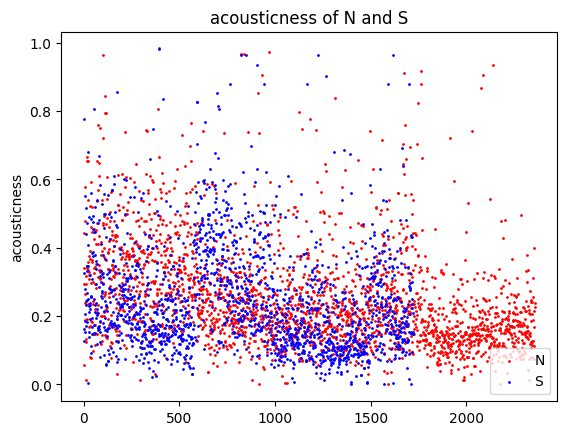

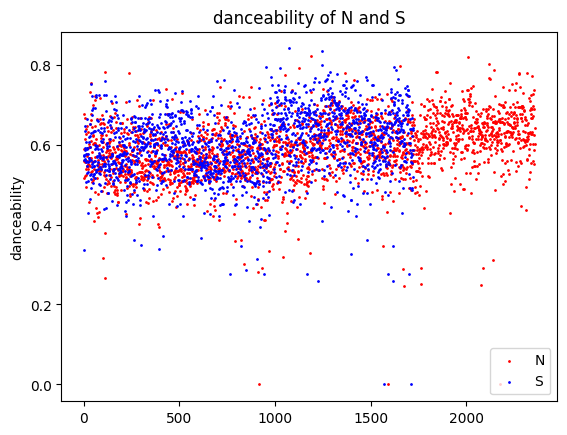

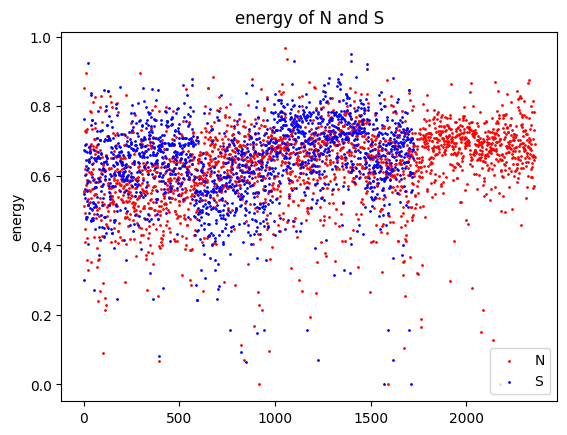

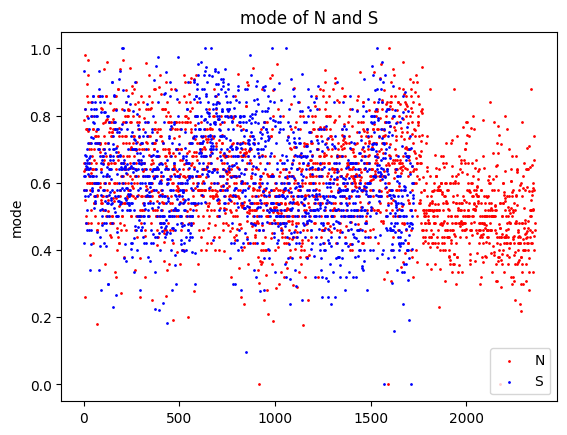

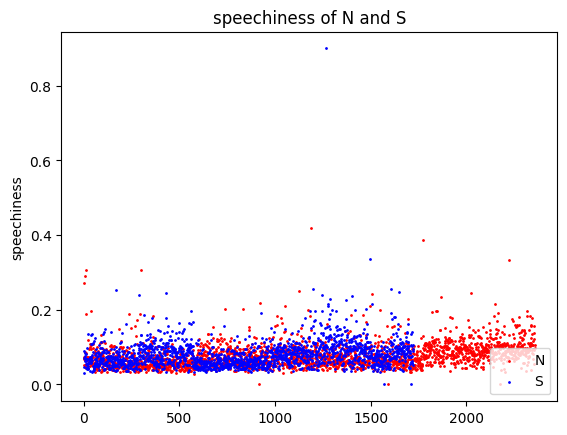

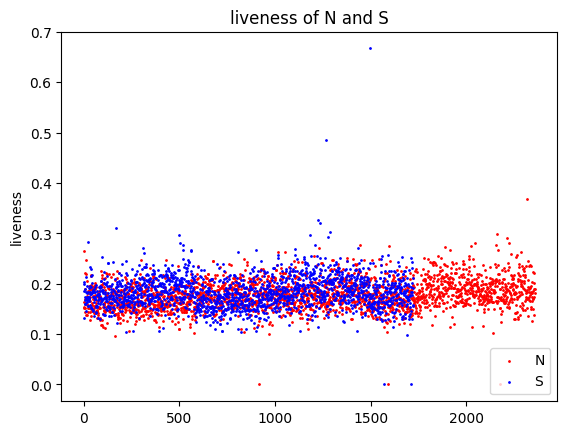

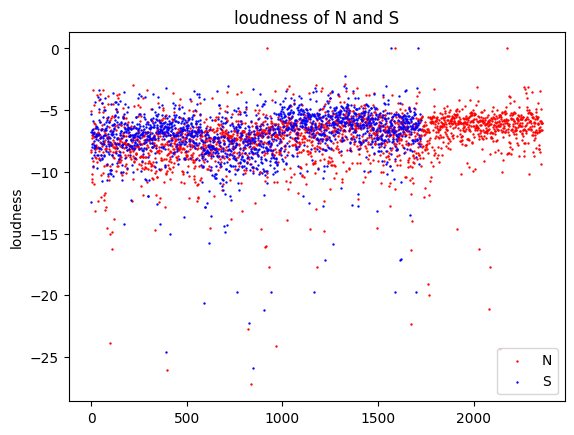

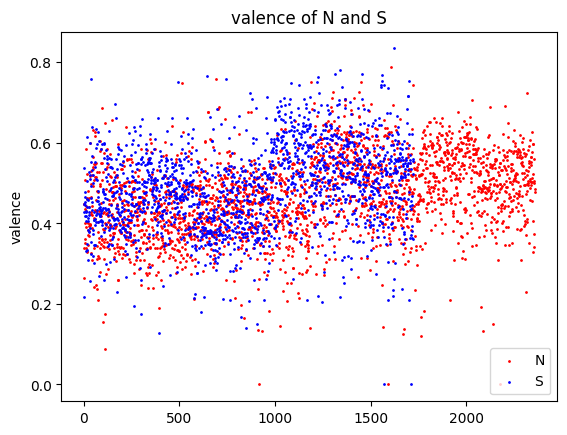

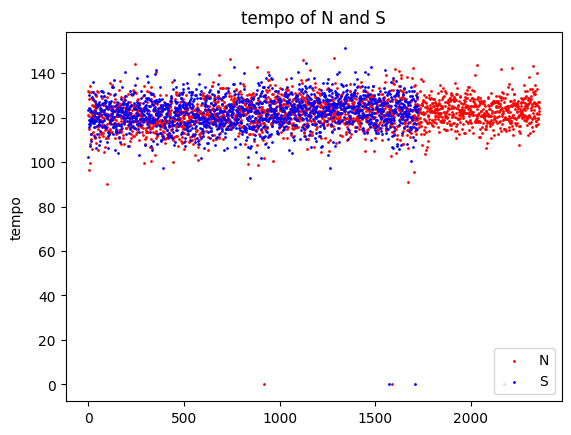

In [12]:
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np

##N or S

#acousticness

n_acousticness = np.arange(len(data_xNxx['acousticness']))
s_acousticness = np.arange(len(data_xSxx['acousticness']))
plt.scatter(n_acousticness, data_xNxx['acousticness'], label='N', c='r', s=1)
plt.scatter(s_acousticness, data_xSxx['acousticness'], label='S', c='b', s=1)
plt.ylabel('acousticness')
plt.title('acousticness of N and S')
plt.legend(loc='lower right')
plt.show()

#danceability

n_dance = np.arange(len(data_xNxx['danceability']))
s_dance = np.arange(len(data_xSxx['danceability']))
plt.scatter(n_dance, data_xNxx['danceability'], label='N', c='r', s=1)
plt.scatter(s_dance, data_xSxx['danceability'], label='S', c='b', s=1)
plt.ylabel('danceability')
plt.title('danceability of N and S')
plt.legend(loc='lower right')
plt.show()

#energy
n_energy = np.arange(len(data_xNxx['energy']))
s_energy = np.arange(len(data_xSxx['energy']))

plt.scatter(n_energy, data_xNxx['energy'], label='N', c='r', s=1)
plt.scatter(s_energy, data_xSxx['energy'], label='S', c='b', s=1)
plt.ylabel('energy')
plt.title('energy of N and S')
plt.legend(loc='lower right')
plt.show()

# mode
n_mode = np.arange(len(data_xNxx['mode']))
s_mode = np.arange(len(data_xSxx['mode']))
plt.scatter(n_mode, data_xNxx['mode'], label='N', c='r', s=1)
plt.scatter(s_mode, data_xSxx['mode'], label='S', c='b', s=1)
plt.ylabel('mode')
plt.title('mode of N and S')
plt.legend(loc='lower right')
plt.show()

# speechiness
n_speechiness = np.arange(len(data_xNxx['speechiness']))
s_speechiness = np.arange(len(data_xSxx['speechiness']))
plt.scatter(n_speechiness, data_xNxx['speechiness'], label='N', c='r', s=1)
plt.scatter(s_speechiness, data_xSxx['speechiness'], label='S', c='b', s=1)
plt.ylabel('speechiness')
plt.title('speechiness of N and S')
plt.legend(loc='lower right')
plt.show()

#liveness

n_liveness = np.arange(len(data_xNxx['liveness']))
s_liveness = np.arange(len(data_xSxx['liveness']))
plt.scatter(n_liveness, data_xNxx['liveness'], label='N', c='r', s=1)
plt.scatter(s_liveness, data_xSxx['liveness'], label='S', c='b', s=1)
plt.ylabel('liveness')
plt.title('liveness of N and S')
plt.legend(loc='lower right')
plt.show()

#loudness

n_loudness = np.arange(len(data_xNxx['loudness']))
s_loudness = np.arange(len(data_xSxx['loudness']))
plt.scatter(n_loudness, data_xNxx['loudness'], label='N', c='r', s=0.5)
plt.scatter(s_loudness, data_xSxx['loudness'], label='S', c='b', s=0.5)
plt.ylabel('loudness')
plt.title('loudness of N and S')
plt.legend(loc='lower right')
plt.show()

#valence

n_valence = np.arange(len(data_xNxx['valence']))
s_valence = np.arange(len(data_xSxx['valence']))
plt.scatter(n_valence, data_xNxx['valence'], label='N', c='r', s=1)
plt.scatter(s_valence, data_xSxx['valence'], label='S', c='b', s=1)
plt.ylabel('valence')
plt.title('valence of N and S')
plt.legend(loc='lower right')
plt.show()

#tempo

n_tempo = np.arange(len(data_xNxx['tempo']))
s_tempo = np.arange(len(data_xSxx['tempo']))
plt.scatter(n_tempo, data_xNxx['tempo'], label='N', c='r', s=1)
plt.scatter(s_tempo, data_xSxx['tempo'], label='S', c='b', s=1)
plt.ylabel('tempo')
plt.title('tempo of N and S')
plt.legend(loc='lower right')
plt.show()

In [48]:
def counter(arr, number):
    counter = 0
    for num in arr:
        if num == number:
            counter = counter + 1
    return counter

filename = 'data/data_brian.csv'

print(filename)
data_my = pd.read_csv(filename)
X = data_my[['acousticness', 'instrumentalness', 'valence', 'loudness', 'danceability', 'energy' ]]
prec_eori = knn_eori.predict(X)
Icounts = counter(prec_eori, 0)
Ecounts = counter(prec_eori, 1)
print(Icounts, Ecounts, "I" if Icounts > Ecounts else "E")

X = data_my[['acousticness', 'instrumentalness', 'valence', 'danceability', 'loudness']]
prec_nors = knn_nors.predict(X)
Ncounts = counter(prec_nors, 0)
Scounts = counter(prec_nors, 1)
print(Ncounts, Scounts, "N" if Ncounts > Scounts else "S")

X = data_my[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness', 'energy']]
prec_torf = knn_torf.predict(X)
Tcounts = counter(prec_torf, 0)
Fcounts = counter(prec_torf, 1)
print(Tcounts, Fcounts, "T" if Tcounts > Fcounts else "F")

X = data_my[['acousticness', 'instrumentalness', 'speechiness', 'valence', 'loudness']]
prec_jorp = knn_jorp.predict(X)
Jcounts = counter(prec_jorp, 0)
Pcounts = counter(prec_jorp, 1)
print(Jcounts, Pcounts, "J" if Jcounts > Pcounts else "P")



data/data_brian.csv
91 9 I
63 37 N
12 88 F
48 52 P
